### Unidad II. Regresiones y reducción de dimensionalidad.

## Comparación de dos o más poblaciones atendiendo a un conjunto de variables correlacionadas. 

- El análisis de varianza multivariado.

### [MANOVA](https://en.wikipedia.org/wiki/Multivariate_analysis_of_variance)

La hipótesis nula del MANOVA es que todas las [**medias multivariadas**](https://en.wikipedia.org/wiki/Multivariate_random_variable) son iguales entre los grupos.

In [4]:
using RCall
using RDatasets

water = dataset("HSAUR", "water")

head(water)

,Location,Town,Mortality,Hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18
6,North,Bolton,1558,10


> **Assumptions**
- **Normal Distribution:** The dependent variable should be normally distributed within
groups. Overall, the F test is robust to non-normality, if the non-normality is caused
by skewness rather than by outliers. Tests for outliers should be run before
performing a MANOVA, and outliers should be transformed or removed.  
- **Linearity:** MANOVA assumes that there are linear relationships among all pairs of
dependent variables, all pairs of covariates, and all dependent variable-covariate
pairs in each cell. Therefore, when the relationship deviates from linearity, the power
of the analysis will be compromised.  
- **Homogeneity of Variances:** Homogeneity of variances assumes that the dependent
variables exhibit equal levels of variance across the range of predictor variables. 
Remember that the error variance is computed (SS error) by adding up the sums of
squares within each group. If the variances in the two groups are different from each
other, then adding the two together is not appropriate, and will not yield an estimate
of the common within-group variance. Homoscedasticity can be examined
graphically or by means of a number of statistical tests.
- **Homogeneity of Variances and Covariances:** - In multivariate designs, with multiple
dependent measures, the homogeneity of variances assumption described earlier
also applies. However, since there are multiple dependent variables, it is also
required that their intercorrelations (covariances) are homogeneous across the cells
of the design. There are various specific tests of this assumption. 
>> - *French, Aaron, et al. "Multivariate analysis of variance (MANOVA)." 2008-06-03 [2013-01-31]. [http://userwww.sfsu.edu/efc/classes/biol710/manova/MANOVAnewest.pdf](http://userwww.sfsu.edu/efc/classes/biol710/manova/MANOVAnewest.pdf) (2008).*

In [5]:
using Plots
pyplot(size=(600,300))

Plots.PyPlotBackend()


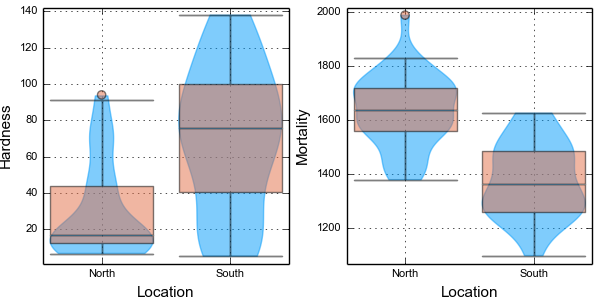

In [6]:
hardness = violin(water, :Location, :Hardness, alpha=0.5)
boxplot!(hardness, water, :Location, :Hardness, line=:black, alpha=0.5)

mortality = violin(water, :Location, :Mortality, alpha=0.5)
boxplot!(mortality, water, :Location, :Mortality, line=:black, alpha=0.5)

plot(hardness, mortality, legend=false)

> **Multicollinearity and Singularity:** When there is high correlation between dependent
variables, one dependent variable becomes a near-linear combination of the other
dependent variables. Under such circumstances, it would become statistically
redundant and suspect to include both combinations.
>> - *French, Aaron, et al. "Multivariate analysis of variance (MANOVA)." 2008-06-03 [2013-01-31]. [http://userwww.sfsu.edu/efc/classes/biol710/manova/MANOVAnewest.pdf](http://userwww.sfsu.edu/efc/classes/biol710/manova/MANOVAnewest.pdf) (2008).* 


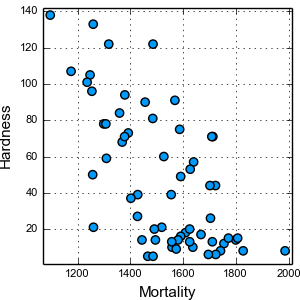

In [7]:
scatter(water, :Mortality, :Hardness, size=(300,300), legend=false)

In [8]:
R"""
cor.test(
    $( water[:Mortality] ), 
    $( water[:Hardness]  )  )
"""

RCall.RObject{RCall.VecSxp}

	Pearson's product-moment correlation

data:  `#JL`$`(water[:Mortality])` and `#JL`$`(water[:Hardness])`
t = -6.6555, df = 59, p-value = 1.033e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7783208 -0.4826129
sample estimates:
       cor 
-0.6548486 



In [9]:
R"MANOVA <- manova(cbind(Hardness, Mortality) ~ Location, data = $water)"

RCall.RObject{RCall.VecSxp}
Call:
   manova(cbind(Hardness, Mortality) ~ Location, data = `#JL`$water)

Terms:
                 Location Residuals
resp 1              23122     63947
resp 2           983729.2 1129444.4
Deg. of Freedom         1        59

Residual standard errors: 32.92184 138.3587
Estimated effects may be unbalanced


> The `summary.manova` method uses a multivariate test statistic for the summary table. **Wilks' statistic** is most popular in the literature, but the default **Pillai–Bartlett statistic** is recommended by Hand and Taylor (1987).

In [10]:
R"""
summary(MANOVA, test="Wilks")
"""

RCall.RObject{RCall.VecSxp}
          Df   Wilks approx F num Df den Df    Pr(>F)    
Location   1 0.52626   26.106      2     58 8.217e-09 ***
Residuals 59                                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [11]:
R"""
summary(MANOVA, test="Pillai")
"""

RCall.RObject{RCall.VecSxp}
          Df  Pillai approx F num Df den Df    Pr(>F)    
Location   1 0.47374   26.106      2     58 8.217e-09 ***
Residuals 59                                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
